<h1> 1.Problem Statement</h1>

- Given a Cricket match video, generate the highlight from the video

<h2> 1.1 Dataset Description </h2>

- For the processing I have download the cricket match video from youtube. It is a famous video, in which yuvraj singh hit 6 sixes on six balls in T-20 world cup 2007

<h2> 1.2 Sources/Useful Links</h2>

- You Tube Link for the Video : https://www.youtube.com/watch?v=KPn3ZUcaBOY

### Approach
- In our approach we have used sound energy for the categorization of the 5 second video chunk, whether it should be in the highlight or not. Through exploratory data analysis we found out the optimal threshold. If some part of the video is having less sound energy then threshold, we will remove that part from the video. 

In [220]:
import librosa 
import matplotlib.pyplot as plt
import IPython.display as ipd 
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

In [221]:
filename='Audio.wav' 
x, sr = librosa.load(filename,sr=16000)

In [225]:
chunck_size=5 
length = chunck_size * sr

In [226]:
a=x[20*length:25*length] 
ipd.Audio(a, rate=sr)

## Data Visualization

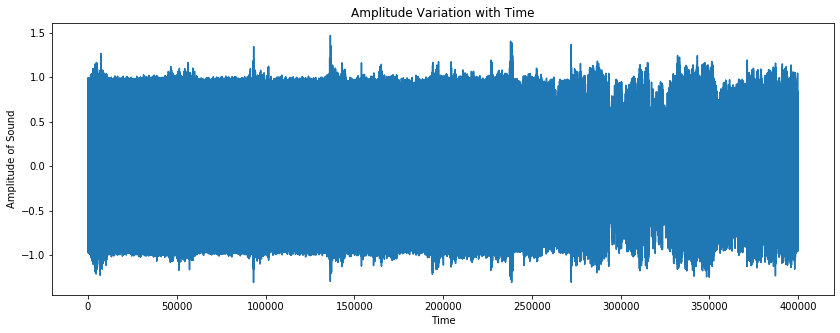

In [227]:
## seeing the visuzlization by zoom in
plt.figure(figsize=(14, 5)) 
plt.plot(a)
plt.xlabel('Time')
plt.ylabel('Amplitude of Sound')
plt.title('Amplitude Variation with Time')
plt.show()

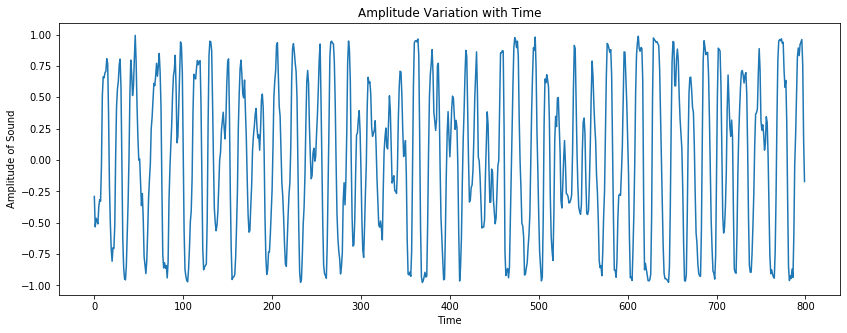

In [228]:
## seeing the visuzlization by zoom in
plt.figure(figsize=(14, 5)) 
plt.plot(a[:800])
plt.xlabel('Time')
plt.ylabel('Amplitude of Sound')
plt.title('Amplitude Variation with Time')
plt.show()

### Calculating the energy of each chunck

In [139]:
energy = []
for i in range(0,len(x),80000):
    energy.append(sum(abs(x[i:i+length]))) 

In [229]:
energy1 = np.sort(energy)

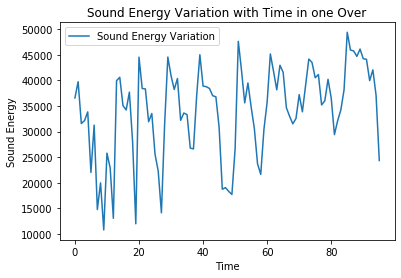

In [230]:
plt.plot(energy)
plt.ylabel('Sound Energy')
plt.xlabel('Time')
plt.title('Sound Energy Variation with Time in one Over')
plt.legend(['Sound Energy Variation'])
plt.show()

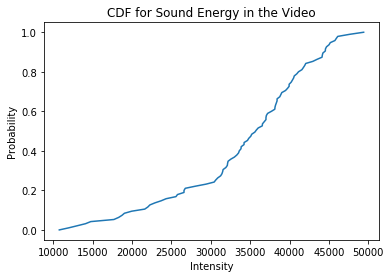

In [231]:
yvals=np.arange(len(energy1))/float(len(energy1)-1)
plt.plot(energy1,yvals)
plt.title('CDF for Sound Energy in the Video')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.show()

## calculating the energy for entire dataset and saving it into a pandas dataFrame

In [184]:
df1=pd.DataFrame(columns=['energy','start','end'])
start = []
end = []
val = []
for i in range(len(energy)):
    start.append(i*5)
    end.append((i+1)*5)

In [185]:
df1['energy'] = energy
df1['start'] = start
df1['end'] = end

In [186]:
df1.head()

,energy,start,end
0,36567.718405,0,5
1,39736.665059,5,10
2,31566.028911,10,15
3,32138.456281,15,20
4,33837.666212,20,25


## Removing all the rows with certain threshold
- Here we are taking the threshold value as 25000 and 35000 means if some frame having energy level less then 25000 we will ignore that and if some frame is having energy level greater then 35000, we will also ignore that

In [202]:
df = df1[df1['energy'] >= 25000]

In [203]:
df = df[df['energy']<=35000]

In [204]:
df.head()

,energy,start,end
2,31566.028911,10,15
3,32138.456281,15,20
4,33837.666212,20,25
6,31255.488286,30,35
10,25779.849826,50,55


In [205]:
df.tail()

,energy,start,end
69,32544.162557,345,350
71,33866.257157,355,360
81,29402.332372,405,410
82,32104.470776,410,415
83,34232.422466,415,420


In [206]:
df.reset_index(drop=True, inplace=True)

In [207]:
df.head()

,energy,start,end
0,31566.028911,10,15
1,32138.456281,15,20
2,33837.666212,20,25
3,31255.488286,30,35
4,25779.849826,50,55


In [212]:
start=df['start'].values
end=df['end'].values
for i in range(len(df)):
    start_time = start[i] 
    end_time   = end[i]   
    ffmpeg_extract_subclip("Video.mp4",start_time,end_time,targetname="clips/frames" + str(i+1) + ".mp4") #extracting the particular chunk from the full video and save in the system

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

### Combining all the clips into one file.
- it's quality will not be too good, we can use some software to combine the video for good quality

In [215]:
## Reference: https://www.quora.com/How-can-I-join-10-small-videos-30-sec-each-using-Python-into-1-video-I-need-to-automate-it-as-I-have-3000+-types-of-these-videos-I-have-to-combine
from moviepy.editor import VideoFileClip, concatenate_videoclips
import os
clip_name = os.listdir('clips/')
final_clip = VideoFileClip("clips/frames1.mp4")
for name in clip_name[1:]:
    clip1 = VideoFileClip('clips/'+name)
    final_clip = concatenate_videoclips([final_clip,clip1])
final_clip.write_videofile("Highlight.mp4")

Moviepy - Building video Highlight.mp4.
MoviePy - Writing audio in HighlightTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video Highlight.mp4



Moviepy - Done !
Moviepy - video ready Highlight.mp4
